In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"D:\Courses\Data Analysis\رواد مصر الرقميه\supply_chain_data Fashion  Beauty startup.csv")

In [4]:
data 

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [4]:
# Check for nulls
data.isna().sum().any()

False

In [5]:
#Check for completness & datatypes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [9]:
(data['Availability'] > 100).any()

False

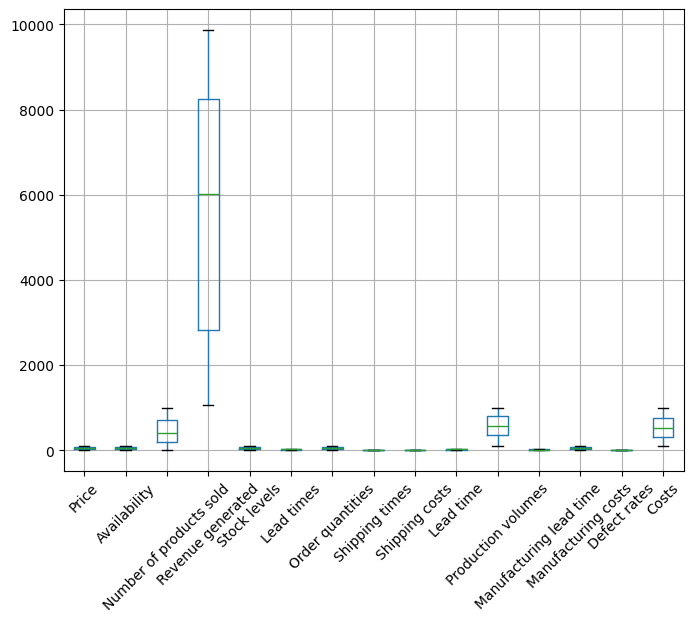

In [6]:
# Check for ouliers
import matplotlib.pyplot as plt

data.boxplot(figsize=(8, 6))
plt.xticks(rotation=45)  
plt.show()

count     100.000000
mean     5776.048187
std      2732.841744
min      1061.618523
25%      2812.847151
50%      6006.352023
75%      8253.976921
max      9866.465458
Name: Revenue generated, dtype: float64


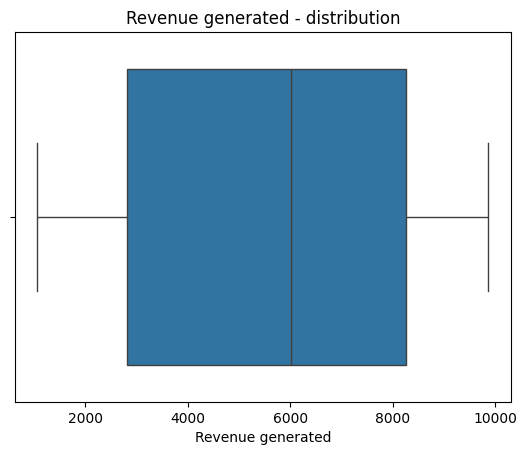

In [7]:
import seaborn as sns

print (data['Revenue generated'].describe())
sns.boxplot(data=data, x="Revenue generated").set_title("Revenue generated - distribution");
plt.show()

count    100.000000
mean     460.990000
std      303.780074
min        8.000000
25%      184.250000
50%      392.500000
75%      704.250000
max      996.000000
Name: Number of products sold, dtype: float64


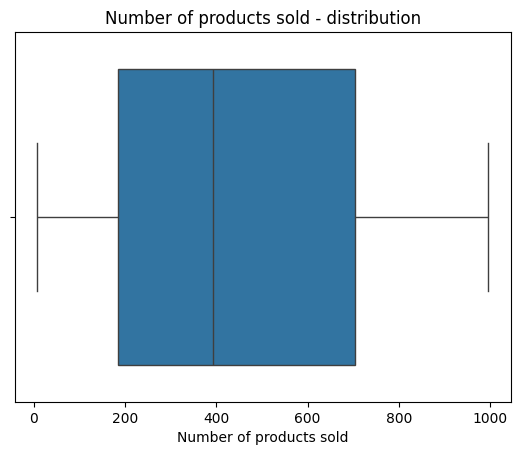

In [8]:
print (data['Number of products sold'].describe())
sns.boxplot(data=data, x="Number of products sold").set_title("Number of products sold - distribution")
plt.show()

In [10]:
failmask = data['Inspection results'] == "Fail"
passmask = data['Inspection results'] == "Pass"

In [11]:
data[failmask]['Defect rates'].min()

0.0453022623982596

In [12]:
data[passmask]['Defect rates'].max()

4.843456577118041

In [27]:
#Check for routs & modes variety
unique_combinations = data[['Transportation modes', 'Routes']].drop_duplicates()
unique_combinations

,Transportation modes,Routes
0,Road,Route B
2,Air,Route C
3,Rail,Route A
4,Air,Route A
5,Road,Route A
6,Sea,Route A
7,Road,Route C
8,Sea,Route B
9,Rail,Route B
14,Air,Route B


In [28]:
#Top selling products
data[["Product type","SKU","Number of products sold","Location"]].sort_values("Number of products sold", ascending=False).head(5)

,Product type,SKU,Number of products sold,Location
10,skincare,SKU10,996,Kolkata
94,cosmetics,SKU94,987,Delhi
9,skincare,SKU9,980,Chennai
36,skincare,SKU36,963,Delhi
37,skincare,SKU37,963,Kolkata


In [39]:
#Products with high returning rate
mask = data['Number of products sold'] < data['Order quantities']
data['SKU'][mask]

2      SKU2
45    SKU45
85    SKU85
Name: SKU, dtype: object

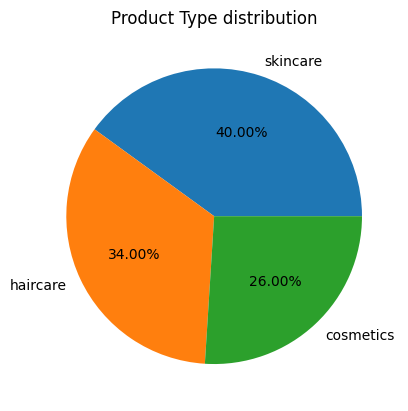

In [19]:
# Product Type distribution
pie_labels = data['Product type'].value_counts().index.to_list()
plt.pie(data['Product type'].value_counts(), autopct="%.2f%%", labels = pie_labels)
plt.title ("Product Type distribution")
plt.show()

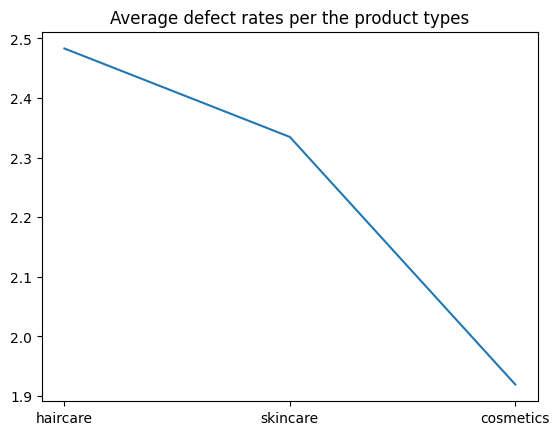

In [34]:
# Average defect rates per the product types
df_product_type_defect= data[['Product type','Defect rates']].copy()
df_product_type_defect = df_product_type_defect.groupby('Product type').mean()
df_product_type_defect.sort_values(by="Defect rates", ascending=False, inplace=True)

plt.plot(df_product_type_defect)
plt.title("Average defect rates per the product types")
plt.show()

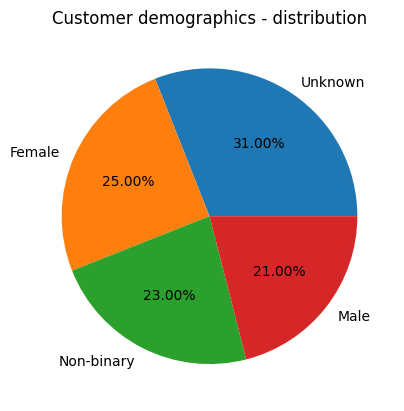

In [36]:
# Customer demographics - distribution
gender_labels = data['Customer demographics'].value_counts().index.to_list()
plt.pie(data['Customer demographics'].value_counts(), labels=gender_labels, autopct="%.2f%%")
plt.title("Customer demographics - distribution")
plt.show()

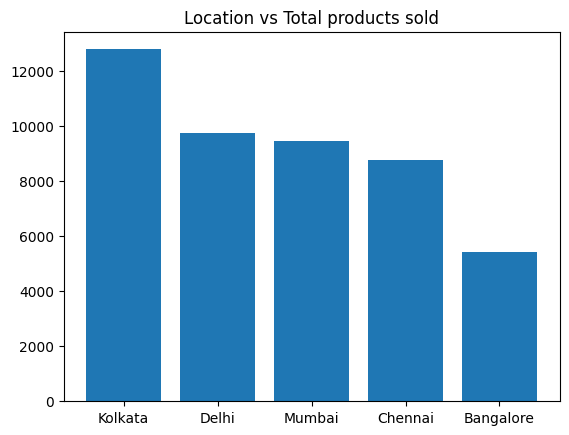

In [38]:
# Location vs Total products sold
df_loc_product_sell = data[["Location", "Number of products sold"]].copy()
df_loc_product_sell=df_loc_product_sell.groupby('Location').sum()
df_loc_product_sell.rename(columns={'Number of products sold':"SoldProducts"}, inplace=True)
df_loc_product_sell.sort_values(by="SoldProducts",ascending=False, inplace=True)

plt.bar(df_loc_product_sell.index, df_loc_product_sell['SoldProducts'])
plt.title("Location vs Total products sold")
plt.show()

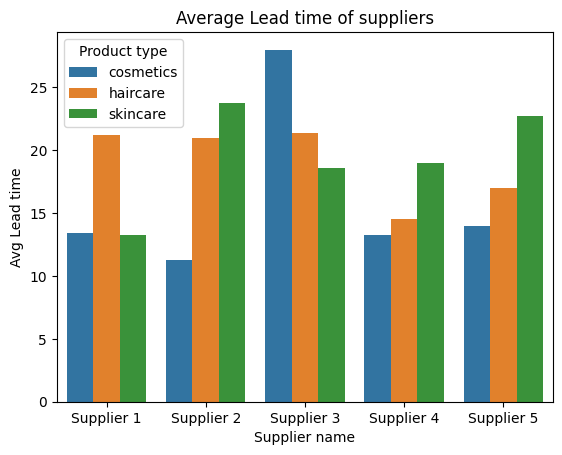

In [40]:
# Average Lead time of suppliers
df_supplier_product_type = data[['Product type', 'Supplier name', 'Lead time']].copy()
df_supplier_product_type = df_supplier_product_type.groupby(['Supplier name', 'Product type']).mean('Lead time')
df_supplier_product_type.rename(columns={'Lead time':'Avg Lead time'}, inplace=True)
df_supplier_product_type.reset_index(inplace=True)
sns.barplot(data=df_supplier_product_type,
            x="Supplier name",
            y="Avg Lead time",
            hue="Product type"). set_title("Average Lead time of suppliers")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X = data[['Availability','Price', 'Costs', 'Lead times', 'Shipping times', 'Production volumes']]
y = data['Number of products sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

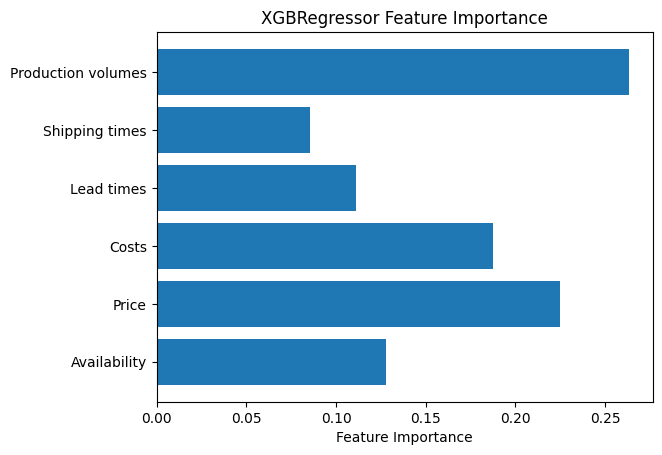

In [29]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("XGBRegressor Feature Importance")
plt.show()

In [30]:
new_data = [[50, 100, 5.0, 12, 3, 200]]  # hypothetical future values for features
future_sales = model.predict(new_data)
print(f'Predicted sales: {future_sales}')

Predicted sales: [765.1579]
